## Stationary Problem

In [1]:
# Add temporary path to code
import sys
sys.path.append("../k_armed_bandit/")

import utils
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# For reproducibility
np.random.seed(123)

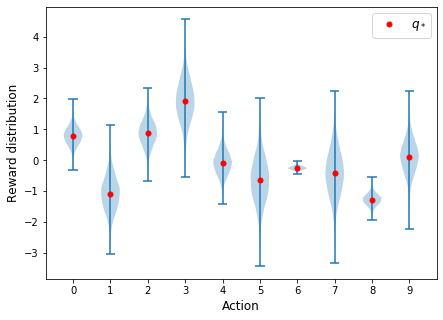

In [2]:
# Initialize bandit
k = 10
bandit = []

MIN_MEAN, MAX_MEAN = (-2, 2)
MIN_STD, MAX_STD = (0, 1)

for idx in range(k):
    mean = round((MAX_MEAN - MIN_MEAN) * np.random.random() + MIN_MEAN, 2)
    std = round((MAX_STD - MIN_STD) * np.random.random() + MIN_STD, 2)
    bandit.append((mean, std))
    
# Plot rewards actions
utils.plot_bandit_dist(bandit)
plt.show()

100%|██████████| 200/200 [02:23<00:00,  1.39it/s]


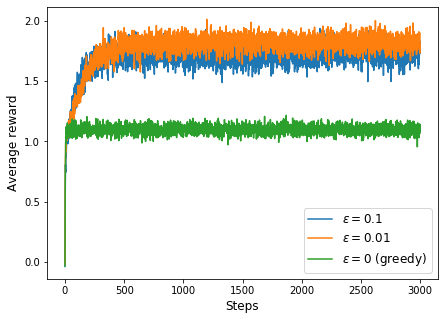

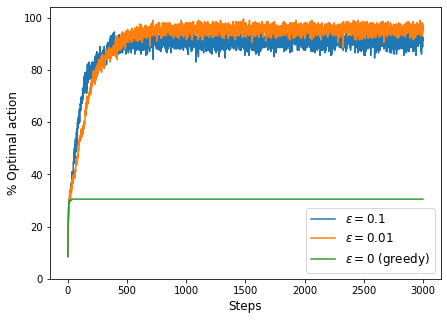

In [3]:
# Initialize variables
num_steps = 3000
num_runs = 200

R1 = np.zeros((num_runs, num_steps))
A1 = np.zeros((num_runs, num_steps))

R2 = np.zeros((num_runs, num_steps))
A2 = np.zeros((num_runs, num_steps))

R3 = np.zeros((num_runs, num_steps))
A3 = np.zeros((num_runs, num_steps))

# Run bandits
for run in tqdm(range(num_runs)):
    Q1, R1[run, :], A1[run, :] = utils.run_bandit_stat(bandit, num_steps, epsilon=0.1)
    Q2, R2[run, :], A2[run, :] = utils.run_bandit_stat(bandit, num_steps, epsilon=0.05)
    Q3, R3[run, :], A3[run, :] = utils.run_bandit_stat(bandit, num_steps, epsilon=0)

# Plot average reward
plt.figure(figsize=(7, 5))
plt.plot(np.mean(R1, axis=0))
plt.plot(np.mean(R2, axis=0))
plt.plot(np.mean(R3, axis=0))
plt.xlabel("Steps", fontsize=12)
plt.ylabel("Average reward", fontsize=12)
plt.legend([r"$\epsilon = 0.1$", r"$\epsilon = 0.01$", r"$\epsilon = 0$ (greedy)"], fontsize=12)
plt.show()

# Plot % optimal action
plt.figure(figsize=(7, 5))
plt.plot(np.mean(A1, axis=0))
plt.plot(np.mean(A2, axis=0))
plt.plot(np.mean(A3, axis=0))
plt.xlabel("Steps", fontsize=12)
plt.ylabel("% Optimal action", fontsize=12)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ["0", "20", "40", "60", "80", "100"])
plt.legend([r"$\epsilon = 0.1$", r"$\epsilon = 0.01$", r"$\epsilon = 0$ (greedy)"], fontsize=12)
plt.show()

## References
[Reinforcement Learning: Multi-armed Bandits (Chapter 2)](https://mitpress.mit.edu/books/reinforcement-learning-second-edition)